<a href="https://colab.research.google.com/github/valesierrai/Analisis-Supervisado-para-el-AD/blob/main/Parcial_1_VSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**0. Cargamos Librerias**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Cargamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**1. Cargamos la Base de Datos**

In [ ]:
#Cargamos la base de datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/cancer_reg.csv')
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


#**2. Organizamos y Revisamos los Datos**

In [ ]:
#Revisamos las columnas
df.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [ ]:
#Seleccionamos las variables que vamos a utilizar, eliminando aquellas que no nos sirven
data= df.drop(labels=['target_deathrate', 'medincome', 'popest2015', 'binnedinc', 'medianage', 'medianagemale', 'medianagefemale', 'geography',
                      'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctemployed16_over', 'pctunemployed16_over',
                      'pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian', 'pctotherrace', 'pctmarriedhouseholds',
                      'birthrate', 'pctbachdeg25_over', 'studypercap', 'percentmarried', 'pctprivatecoveragealone'], axis=1)
data.head()

,avganncount,avgdeathsperyear,incidencerate,povertypercent,pctprivatecoverage
0,1397.0,469,489.8,11.2,75.1
1,173.0,70,411.6,18.6,70.2
2,102.0,50,349.7,14.6,63.7
3,427.0,202,430.4,17.1,58.4
4,57.0,26,350.1,12.5,61.6


Escogimos estas variables, porque me parecieron que los datos que tienen, son de mayor importancia con respecto a las otras. Por ejemplo, me parece importante tener el promedio de casos que se registran anualmente de cancer, asimismo, la tasa de mortalidad, los registors per capita de cancer, el porcentaje de pobreza (es importante pues podriamos hacer una análisis de esto en comparación a la tasa de mortalidad y saber si esto influye), y por último si se tiene cobertura a la salud. Todas las variables que seleccioné siento que se complementan entre sí y por ende me podrán arrojar un buen resultado.  

In [ ]:
#Revisamos los datos
data.isna().sum()

,0
avganncount,0
avgdeathsperyear,0
incidencerate,0
povertypercent,0
pctprivatecoverage,0


In [ ]:
#Analizamos las variables
data.describe()

,avganncount,avgdeathsperyear,incidencerate,povertypercent,pctprivatecoverage
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,448.268586,16.878175,64.354939
std,1416.356223,504.134286,54.560733,6.409087,10.647057
min,6.000000,3.000000,201.300000,3.200000,22.300000
25%,76.000000,28.000000,420.300000,12.150000,57.200000
50%,171.000000,61.000000,453.549422,15.900000,65.100000
75%,518.000000,149.000000,480.850000,20.400000,72.100000
max,38150.000000,14010.000000,1206.900000,47.400000,92.300000


Aquí notamos que hay datos relativamente altos, que pueden ser atípicos. Sin embargo, vamos a proseguimos a revisar variable por variable, por dos razones. La primera, para borrar esos datos atípicos (según las gráficas), y la segunda para así escoger la mejor variable, que será la variable a predecir.

##*avganncount*

<Axes: >

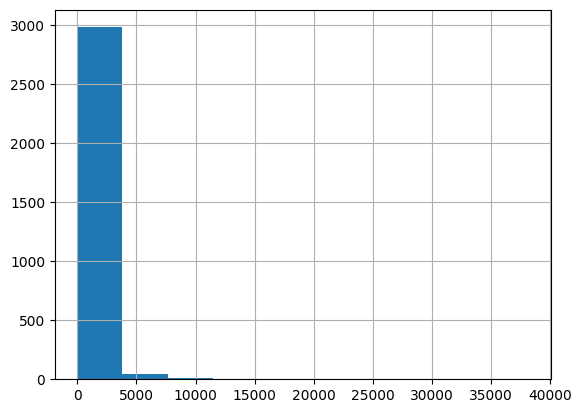

In [ ]:
#Histograma
data['avganncount'].hist()

<Axes: >

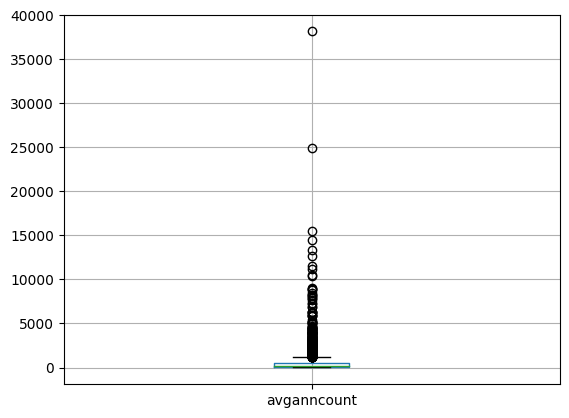

In [ ]:
#Diagrama de Cajas y Bigotes
data.boxplot(column='avganncount')

In [ ]:
#Borramos los datos que con base a las gráficas consideramos atípicos
data = data[data['avganncount'] < 400]

Borramos los datos basados en la gráfica menores a 5000, pero vimos que todavía quedaban muchos datos atípicos, y por ende con base a las gráficas que nos iba dando, borramos a partir de 400.

<Axes: >

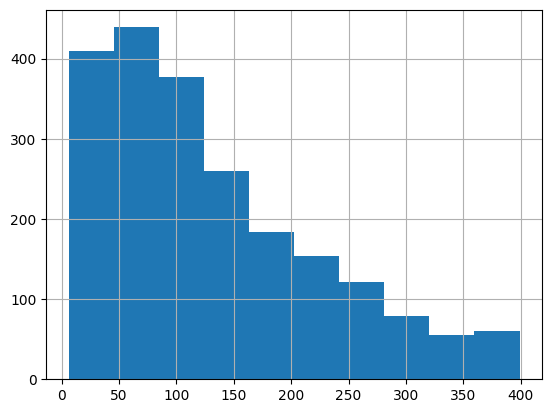

In [ ]:
#Histograma
data['avganncount'].hist()

<Axes: >

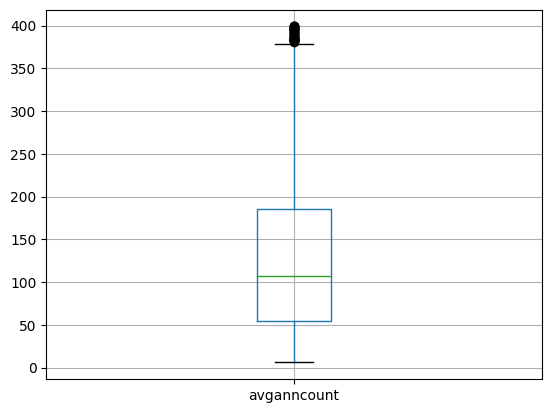

In [ ]:
#Diagrama de cajas y bigotes
data.boxplot(column='avganncount')

##*avgdeathsperyear*

<Axes: >

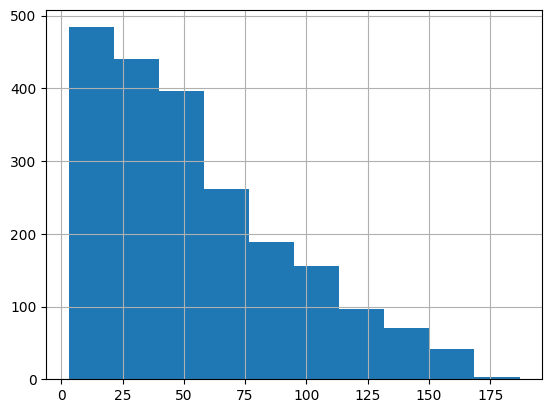

In [ ]:
#Histograma
data['avgdeathsperyear'].hist()

<Axes: >

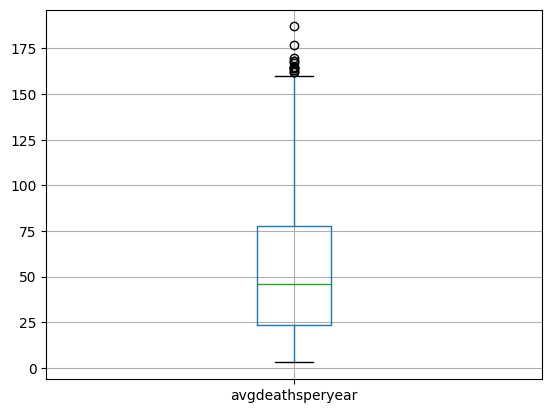

In [ ]:
#Diagrama de Cajas y Bigotes
data.boxplot(column='avgdeathsperyear')

Borramos a partir de 160 pues eso es lo que nos muestra la gráfica, dandonos a entender que los datos por encima de esto son los atípicos.

In [ ]:
#Hacemos un filtro
data = data[data['avgdeathsperyear'] < 160]

<Axes: >

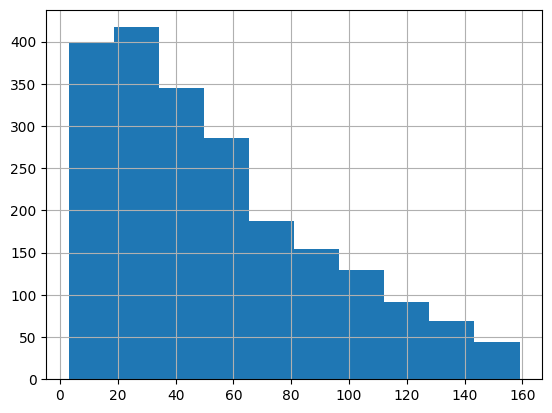

In [ ]:
#Histograma
data['avgdeathsperyear'].hist()

<Axes: >

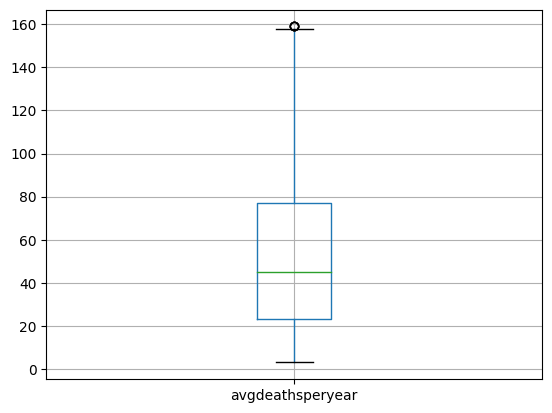

In [ ]:
#Diagrama de cajas y bigotes
data.boxplot(column='avgdeathsperyear')

##*incidencerate*

<Axes: >

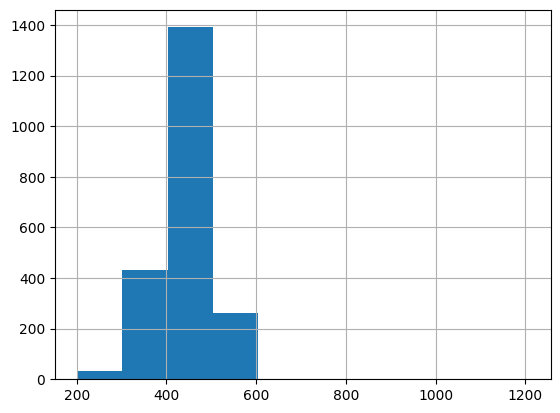

In [ ]:
#Histograma
data['incidencerate'].hist()

<Axes: >

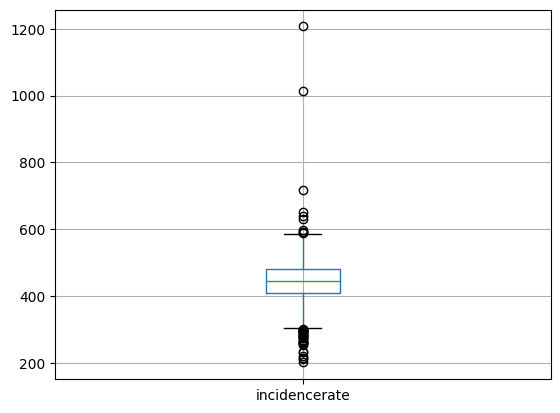

In [ ]:
#Diagrama de cajas y bigotes
data.boxplot(column='incidencerate')

Hacemos un doble filtro de datos atípicos, pues para este caso tenemos que establecer un min y un max, para obtener mejores resultados. Para, este caso, según la gráfica borramos mayor a 350 y menor a 600.

In [ ]:
#Hacemos filtro
data = data[data['incidencerate'] < 600]
data = data[data['incidencerate'] > 350]

<Axes: >

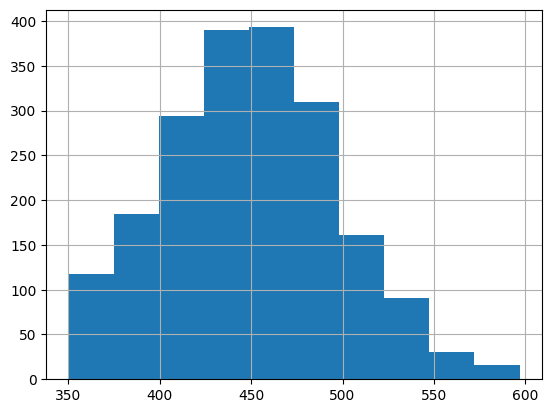

In [ ]:
#Histograma
data['incidencerate'].hist()

<Axes: >

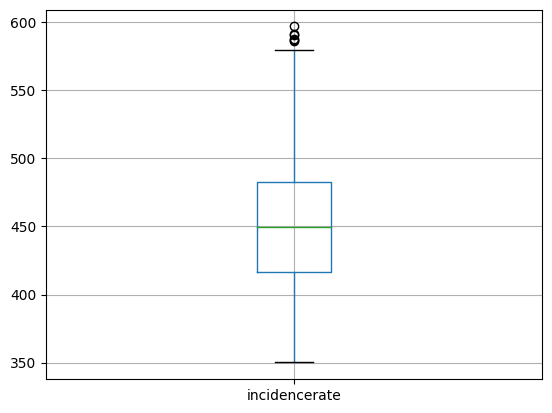

In [ ]:
#Diagrama de cajas y bigotes
data.boxplot(column='incidencerate')

##*povertypercent*

<Axes: >

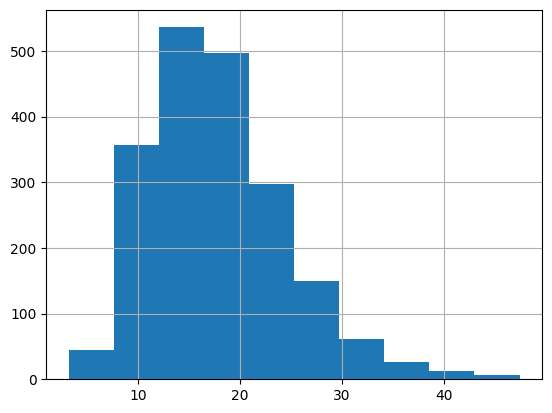

In [ ]:
#Histograma
data['povertypercent'].hist()

<Axes: >

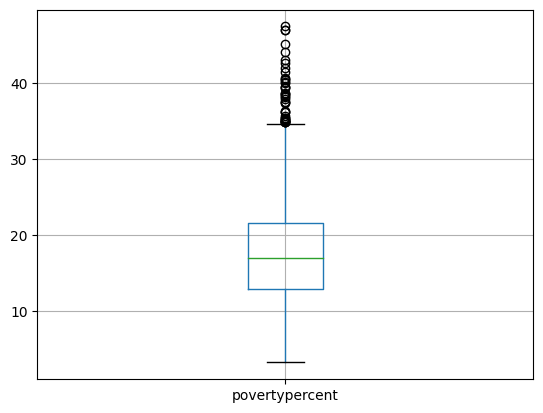

In [ ]:
#Diagrama de cajas y bigotes
data.boxplot(column='povertypercent')

Según los gráficos logramos ver que los datos atípicos empiezan a aparecer a partir de 35.

In [ ]:
#Hacemos la limpieza
data = data[data['povertypercent'] < 35]

<Axes: >

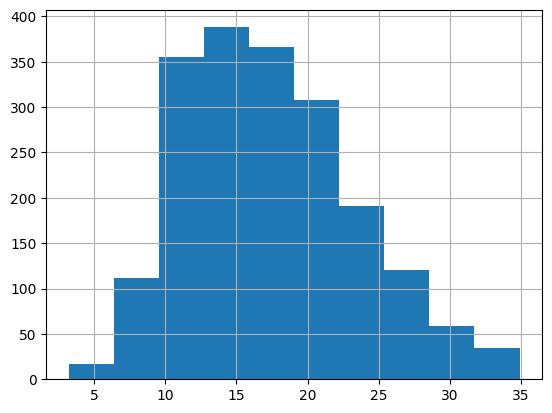

In [ ]:
#Histograma
data['povertypercent'].hist()

<Axes: >

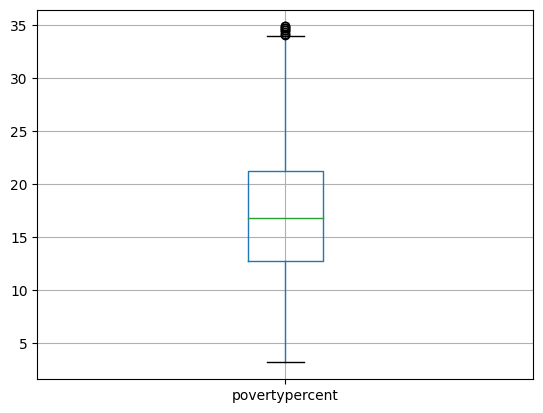

In [ ]:
#Diagrama de cajas y bigotes
data.boxplot(column='povertypercent')

##*pctprivatecoverage*

<Axes: >

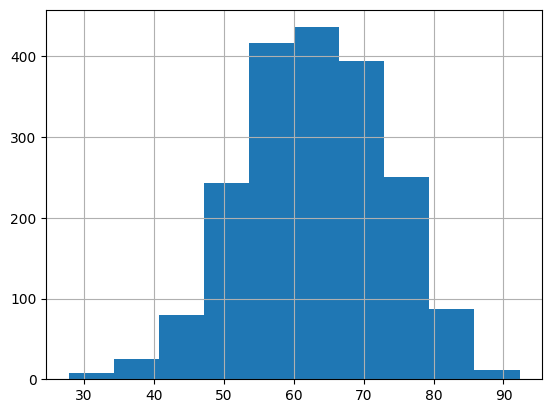

In [ ]:
#Histograma
data['pctprivatecoverage'].hist()

<Axes: >

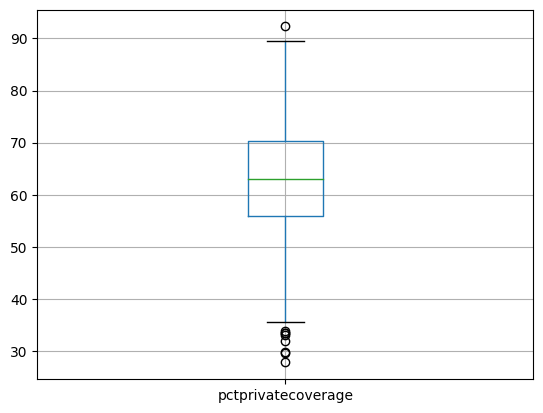

In [ ]:
#Diagrama de Cajas y Bigotes
data.boxplot(column='pctprivatecoverage')

Acá vemos que toca aplicar dos filtros, seleccionando solo los valores que entre (35,90) ya que esto es lo que nos muestran los gráficos

In [ ]:
#Limpiamos los datos
data = data[data['pctprivatecoverage'] < 90]
data = data[data['pctprivatecoverage'] > 35]

<Axes: >

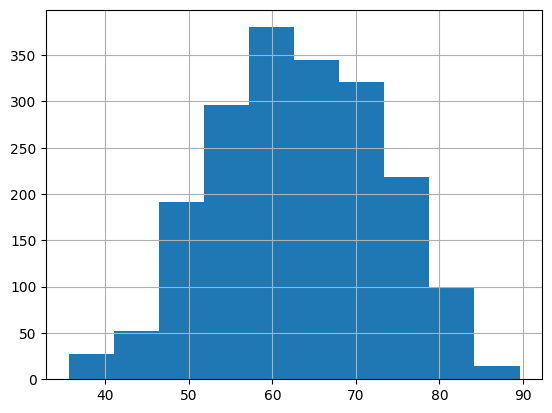

In [ ]:
#Histograma
data['pctprivatecoverage'].hist()

<Axes: >

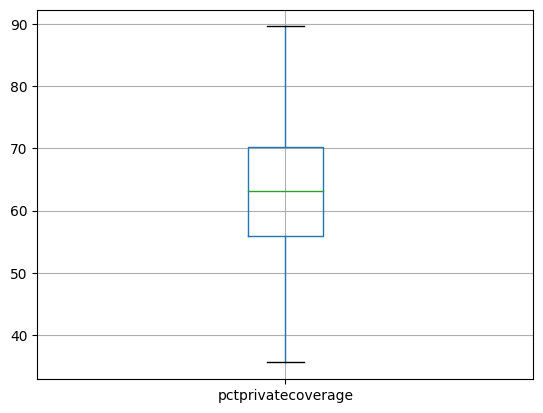

In [ ]:
#Diagrama de cajas y bigotes
data.boxplot(column='pctprivatecoverage')

##Para este caso la variable a predecir es 'pctprivatecoverage' pues fue la que mejor quedó, y las variables predictoras serán las demás.

#**3. Separamos los datos entre train y test**

In [ ]:
#Miramos cuantos datos tenemos
data.shape

(1942, 5)

Al ser bastantes datos, vamos a separar los datos en train y en test.

In [ ]:
#Colocamos las variables predictoras en X y la variable a predecir en y

#Variables Predictoras
X = data.drop(labels=['pctprivatecoverage'], axis=1)

#Variable a Predecir
y = data['pctprivatecoverage']

In [ ]:
#Separamos los datos en train y en test (80-20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#**4. Realizamos el Modelo (Regresión Múltiple)**

##*4.1. Sin Preprocesamiento*

In [ ]:
#Realizamos una copia de las variables para no dañar las originales
X_train1 = X_train.copy()
y_train1 = y_train.copy()
X_test1 = X_test.copy()
y_test1 = y_test.copy()

In [ ]:
#Revisamos las dimensiones de X
print(X_train1.shape)
print(y_train1.shape)

(1553, 4)
(1553,)


In [ ]:
#Revisamos las dimensiones de y
print(X_test1.shape)
print(y_test1.shape)

(389, 4)
(389,)


In [ ]:
#Hacemos el modelo
#Instanciamos el modelo
model = LinearRegression()
#Entrenamos el modelo
model.fit(X_train1, y_train1)

LinearRegression()

In [ ]:
#Sacamos el score
model.score(X_train1, y_train1)

0.6581957964285483

Ahora, probamos con los datos de prueba (test)

In [ ]:
#Instanciamos el modelo
model = LinearRegression(fit_intercept=True)

#Entrenamos el modelo
model.fit(X_test1,y_test1)

LinearRegression()

In [ ]:
#Sacamos el score
model.score(X_test1, y_test1)

0.6827221427714791

##*4.2. Con Preprocesamiento*

In [ ]:
#Hacemos copia de variables
X_train2 = X_train.copy()
y_train2 = y_train.copy()
X_test2 = X_test.copy()

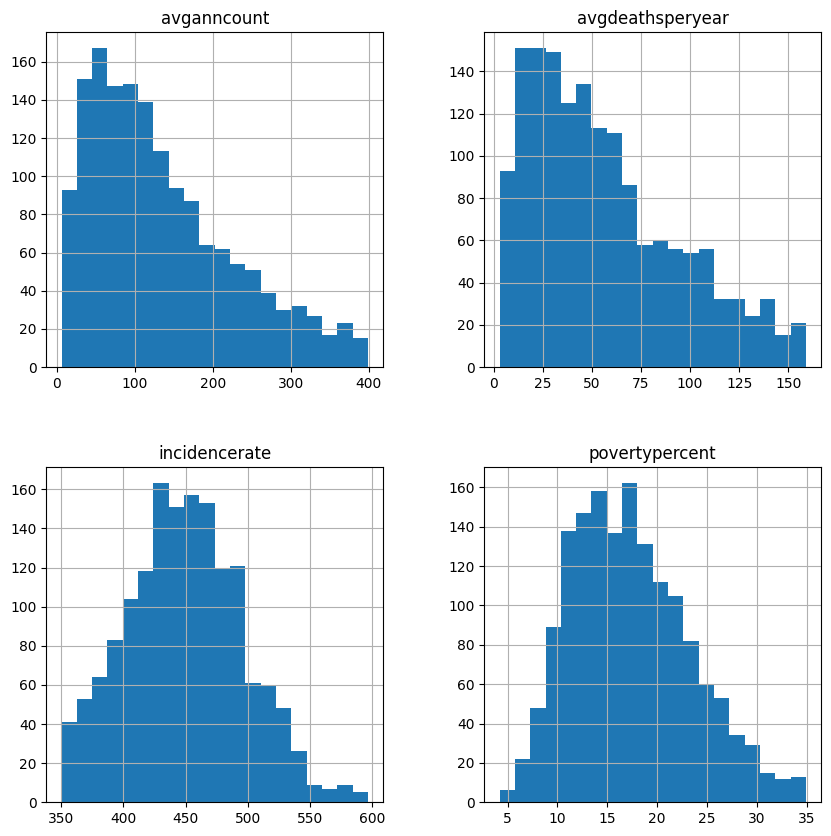

In [ ]:
#Revisamos los histogramas como aproximación a la distribución de probabilidad de cada una de las características de entrenamiento (variables predictoras),
#Para hacer el preprocesmiento apto para cada variable
X_train2.hist(figsize = (10,10), bins = 20);

Para hacer el preprocesamiento analizaremos las variables y decidiremos que método usar.

**'avganncount':** Vemos que esta variable está sesgada, y por ende es mejor aplicar una **tranformación logarítmica**.  

**'avgdeathsperyear':** Al igual que la variable anterior, notamos un sesgo en esta variable, y es por eso que para transformarla utilizaremos **'Power Transformer'**.

**'incidencerate':** Esta variable tiene una forma gaussiana y es por eso que la vamos a **estandarizar**, a pesar de que está levemente inclinada hacía la izquierda.

**'povertypercent':** Si bien esta variable tiene una forma gaussiana, notamos que tiene una inclinación muy marcada hacía la izquierda, y por eso se va a considerar sesgada, y se va a transformar de forma **logarítmica**.

In [ ]:
data.columns

Index(['avganncount', 'avgdeathsperyear', 'incidencerate', 'povertypercent',
       'pctprivatecoverage'],
      dtype='object')

In [ ]:
#Se definen las librerias para el preprocesamiento
from sklearn.preprocessing import StandardScaler, PowerTransformer

#Instanciamos los prepocesadores
power = PowerTransformer()
scaler = StandardScaler()

#Definimos las listas de variables para cada uno de los casos
features_scaler = ['incidencerate']
features_power = ['avganncount', 'avgdeathsperyear', 'povertypercent']

#Aplicamos el prepocesamiento
X_scaler = scaler.fit_transform(X[features_scaler])
X_power = power.fit_transform(X[features_power])

#Concatenamos todas las variables nuevamente en una sola X
X_pre = np.concatenate((X_scaler, X_power), axis = 1)

In [ ]:
#Aplicamos la regularización en la regresión como anteriormente, ahora teniendo en cuenta el preprocesamiento
X_train_p2, X_test_p2, y_train_p2, y_test_p2 = train_test_split(X_pre, y,
                                                    test_size= 0.2,
                                                    random_state= 2)
#Instanciamos el Modelo
model = LinearRegression(fit_intercept=True)

#Entrenamos el modelo
model.fit(X_train_p2,y_train_p2)

#Calculamos el score
model.score(X_train_p2,y_train_p2)

0.676472940549983

Ahora, lo hacemos con los datos de prueba (test)

In [ ]:
#Instanciamos el Modelo
model = LinearRegression(fit_intercept=True)

#Entrenamos el modelo
model.fit(X_test_p2,y_test_p2)

#Calculamos el score
model.score(X_test_p2,y_test_p2)

0.6955056714539977

Para este caso vemos que el score fue superior a los datos de prueba (me puede significar un leve overfitting), lo que es positivo, ya que estos son los datos que yo voy a vender, y vemos que obtuvieron un mejor ajuste que los datos de entrenamiento.

#5. **Análisis de Resultados:**

**Resumen de resultados obtenidos: (4 decimales)**
1. Scores Sin Preprocesamiento:

*   train: 0.6581
*   test: 0.6827

2. Scores Con Preprocesamiento:
*   train: 0.6764
*   test: 0.6955

Teniendo en cuenta el modelo de regresión múltiple y los resultados obtenidos podemos decir, que con base a los resultados del score, cuando hicimos el preprocesamiento el modelo obtuve un mejor ajuste tanto para los datos de entrenamiento como para los datos de prueba. Asimismo, vemos que para ambas situaciones mejoró el ajuste entre los datos de entrenamiento y los datos de prueba, siendo este crecimiento si bien no tan alto, mostró una mejoría.

Finalmente, si tocará escoger entre realizar el modelo con o sin preprocesamiento para este caso sería aplicarlo con preprocesamiento, basicamente por lo explicado anteriormente, y porque al tener el cuenta los solo los datos test, que son con lo que yo voy a vender, el modelo se ajustó más cuando preprocesamos las variables.